<a href="https://colab.research.google.com/github/lucansdev/facial_recognation_bairesdev/blob/main/facial_recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ultralytics tensorflow opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 16.0 MB/s eta 0:00:00


In [52]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [66]:
model = YOLO('yolov8n.pt')


img_path = "/content/FELV-cat.jpg"
img = cv2.imread(img_path)

results = model(img)

detections = results[0].boxes

list_rectangle = []
list_cls = []
for box in detections:
    x1,y1,x2,y2 = box.xyxy[0]
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)

    class_id = int(box.cls[0])
    real_class = results[0].names[class_id]

    list_rectangle.append([x1,y1,x2,y2])
    list_cls.append(real_class)


print(list_cls)




0: 448x640 1 cat, 145.7ms
Speed: 4.4ms preprocess, 145.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
['cat']


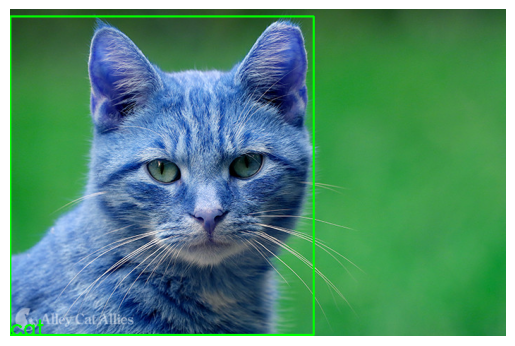

In [67]:
for rec in list_rectangle:
  x1,y1,x2,y2 = rec
  cv2.rectangle(img,(x1,y1),(x2,y2),(0, 255, 0), 2)
  cv2.putText(img,list_cls[0],(x1,y2),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)


plt.imshow(img)
plt.axis('off')
plt.show()